In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
car = pd.read_csv("../../datasets/cars/New_cars_preprocessed.csv")
car.head()

,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,...,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire rim size,MSRP
0,0.333333,0.769231,0.50,0.333333,1.0,0.608427,0.299465,0.0,0.336634,0.266667,...,0.416667,0.25,0.333333,0.0,1.0,0.5,0.279070,0.647059,0.863636,40600.0
1,0.333333,0.769231,0.50,0.333333,1.0,0.608427,0.299465,0.0,0.336634,0.266667,...,0.416667,0.25,0.333333,0.0,1.0,0.5,0.279070,0.647059,0.863636,45500.0
2,0.333333,0.769231,0.50,0.333333,1.0,0.608427,0.299465,0.0,0.336634,0.266667,...,0.416667,0.25,0.333333,0.0,1.0,0.5,0.348837,0.529412,0.909091,43600.0
3,0.333333,0.769231,0.50,0.333333,1.0,0.608427,0.299465,0.0,0.336634,0.266667,...,0.416667,0.25,0.333333,0.0,1.0,0.5,0.279070,0.647059,0.863636,37400.0
4,0.318182,0.769231,0.25,0.333333,1.0,0.608427,0.299465,0.0,0.336634,0.266667,...,0.416667,0.25,0.333333,0.0,1.0,0.5,0.279070,0.647059,0.863636,42600.0


In [4]:
# car = car.drop(['Unnamed: 0'], axis=1)
# car

In [5]:
X_car = car.copy()
y_car = X_car.pop("MSRP")
colnames_car = X_car.columns
colnames = X_car.columns

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   EPA Fuel Economy Est - City (MPG)     32262 non-null  float64
 1   Engine                                32262 non-null  float64
 2   Drivetrain                            32262 non-null  float64
 3   Passenger Capacity                    32262 non-null  float64
 4   Passenger Doors                       32262 non-null  float64
 5   Wheelbase (in)                        32262 non-null  float64
 6   SAE Net Torque @ RPM                  32262 non-null  float64
 7   Fuel System                           32262 non-null  float64
 8   SAE Net Horsepower @ RPM              32262 non-null  float64
 9   Displacement                          32262 non-null  float64
 10  Trans Description Cont.               32262 non-null  float64
 11  Trans Type     

In [7]:
model = DecisionTreeRegressor()
model.fit(X_car, y_car)

DecisionTreeRegressor()

Feature: 0, Score: 0.02243
Feature: 1, Score: 0.00278
Feature: 2, Score: 0.00661
Feature: 3, Score: 0.00504
Feature: 4, Score: 0.00206
Feature: 5, Score: 0.08132
Feature: 6, Score: 0.01197
Feature: 7, Score: 0.02775
Feature: 8, Score: 0.14408
Feature: 9, Score: 0.04953
Feature: 10, Score: 0.00461
Feature: 11, Score: 0.00367
Feature: 12, Score: 0.00242
Feature: 13, Score: 0.00174
Feature: 14, Score: 0.00316
Feature: 15, Score: 0.00179
Feature: 16, Score: 0.00654
Feature: 17, Score: 0.00030
Feature: 18, Score: 0.00269
Feature: 19, Score: 0.26573
Feature: 20, Score: 0.00479
Feature: 21, Score: 0.00236
Feature: 22, Score: 0.00435
Feature: 23, Score: 0.01009
Feature: 24, Score: 0.06491
Feature: 25, Score: 0.02472
Feature: 26, Score: 0.00219
Feature: 27, Score: 0.00796
Feature: 28, Score: 0.05778
Feature: 29, Score: 0.10635
Feature: 30, Score: 0.00253
Feature: 31, Score: 0.00982
Feature: 32, Score: 0.02009
Feature: 33, Score: 0.03582


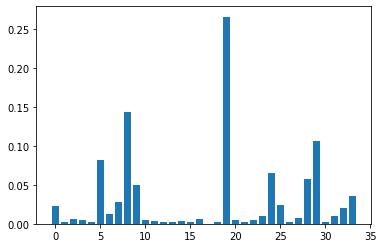

In [8]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [9]:
cart = DecisionTreeRegressor()
cart.fit(X_car,y_car)
ranks["CART"] = ranking(cart.feature_importances_, colnames);
ranks

{'CART': {'EPA Fuel Economy Est - City (MPG)': 0.09,
  'Engine': 0.01,
  'Drivetrain': 0.03,
  'Passenger Capacity': 0.02,
  'Passenger Doors': 0.01,
  'Wheelbase (in)': 0.3,
  'SAE Net Torque @ RPM': 0.06,
  'Fuel System': 0.11,
  'SAE Net Horsepower @ RPM': 0.53,
  'Displacement': 0.19,
  'Trans Description Cont.': 0.02,
  'Trans Type': 0.01,
  'Air Bag-Side Head-Front': 0.01,
  'Air Bag-Side Head-Rear': 0.0,
  'Child Safety Rear Door Locks': 0.01,
  'Daytime Running Lights': 0.0,
  'Traction Control': 0.02,
  'Night Vision': 0.0,
  'Rollover Protection Bars': 0.01,
  'Basic Miles/km': 1.0,
  'Basic Years': 0.03,
  'Corrosion Miles/km': 0.0,
  'Corrosion Years': 0.03,
  'Drivetrain Miles/km': 0.03,
  'Drivetrain Years': 0.25,
  'Turning Diameter - Curb to Curb (ft)': 0.09,
  'Front Wheel Material': 0.01,
  'Roadside Assistance Miles/km': 0.03,
  'Manufacturer': 0.22,
  'Model year': 0.4,
  'Category': 0.01,
  'Front tire width': 0.04,
  'Front tire aspect ratio': 0.08,
  'Front tire 

In [10]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index

In [11]:
ranksout = rank_df.melt(id_vars = 'feature_name', var_name='method', value_name='feature_rank')
ranksout['dataset'] = 'cars'
ranksout

,feature_name,method,feature_rank,dataset
0,EPA Fuel Economy Est - City (MPG),CART,10.5,cars
1,Engine,CART,26.5,cars
2,Drivetrain,CART,17.0,cars
3,Passenger Capacity,CART,21.0,cars
4,Passenger Doors,CART,26.5,cars
5,Wheelbase (in),CART,4.0,cars
6,SAE Net Torque @ RPM,CART,13.0,cars
7,Fuel System,CART,9.0,cars
8,SAE Net Horsepower @ RPM,CART,2.0,cars
9,Displacement,CART,7.0,cars


In [12]:
ranksout.to_csv('../../data/CART/cars_featureranks_CART.csv', sep=';',index=False)